In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

In [15]:
data = pd.read_csv('/Users/vjsamuel/pywork/kmeans/cars.csv')
kmeans_data = data.fillna(0)
kmeans_data.brand = pd.Categorical(kmeans_data.brand)
kmeans_data['brand_code'] = kmeans_data.brand.cat.codes
kmeans_data[:10]
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand', 'brand_code'],
      dtype='object')

In [7]:
columns = ['hp', 'time-to-60', 'brand_code', 'cubicinches']
features_2 = kmeans_data[columns]
def do_kmeans(X, num_cluster):
    model = KMeans(n_clusters=num_cluster)
    model.fit(X)
    return model
kmeans_model = do_kmeans(features_2, 6)

0
1
2


3
4
5


6
7


8


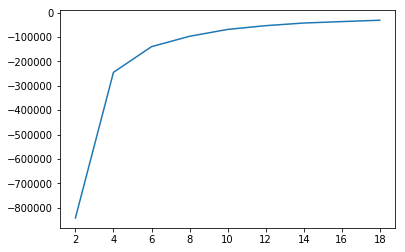

In [8]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(features_2)
pl.plot(Nc,score)

In [9]:
data_labels = kmeans_model.predict(features_2)
collections.Counter(data_labels)

Counter({0: 32, 1: 88, 2: 30, 4: 11, 5: 55, 3: 45})

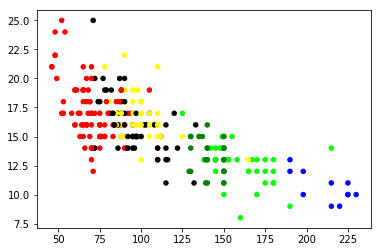

In [6]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_2.iloc[:, 0], features_2.iloc[:, 1], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.show()

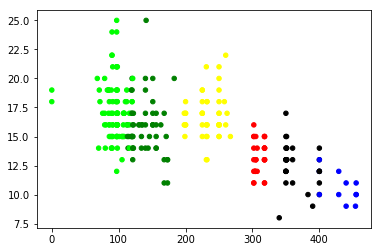

In [16]:
color_map=['black', 'lime', 'red', 'yellow', 'blue', 'green']
plt.scatter(features_2.iloc[:, 3], features_2.iloc[:, 1], c=data_labels, s=20, cmap=colors.ListedColormap(color_map))
plt.show()


In [11]:
features_2[:10]
features_2.iloc[:,]

,hp,time-to-60,brand_code,cubicinches
0,165,12,2,350.0
1,71,14,0,89.0
2,140,11,2,302.0
3,150,10,2,400.0
4,63,17,2,98.0
5,125,17,2,350.0
6,158,13,2,351.0
7,215,9,2,440.0
8,77,20,0,183.0
9,62,17,1,89.0
